Project 1: Alex and Griffith

# What portion of the cat population in Washington, D.C. would have to be neutered to maintain cat and rat populations?

In urban areas, rats pose a health risk and are often unsightly. Cats are heralded as a way to curb rat populations, but environmentalists and other critics take issue with the proliferation of feral cats that kill other small animals and pose their own health concerns. The most accepted method of curbing feral cat populations is Trap-Neuter-Return, which sterilizes cats before returning them to the wild. In this way, feral cat populations can be stabilized without eliminating them completely and thus reintroducing rats. 

# This model aims to determine how to indirectly control rat populations by directly controlling feral cat populations.

In [11]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

In [227]:
def plot_results(TotalCatPop, RatPop, title):
    """Plot the estimates and the model.
    
    TotalCatPop: Timeseries of the total cat population    
    RatPop:  TimeSeries of rat population simulation results
    title: string
    """
    plot(TotalCatPop, label='Total Cat Population')
    plot(RatPop, label='Rat Population')
    title = title
    
    decorate(xlabel = 'Year',
             ylabel = '<Washington, D.C. Population (million)',
            title=title)

In [104]:
def update_population(populations, rates, percent_neutered):
    """Simulate the system for one year
    
    populations: state object with current cats neutered, cats not neutered, and rat population
    rates: System object - Death rates and growth rates
    percent_neutered: Percent of cat population neutered
    
    return: State"""
    populations.cats = update_cat (populations.cats, rates, percent_neutered)
    populations.rats = update_rat (populations, rates)
    
    return populations

In [105]:
def update_cat(pop, rates, percent_neutered):
    """Update the cat population for the next year.
    
    pop: population of cats in millions
    rates: system object with death and growth rates
    """
    growth = rates.cat_growth_coefficient * ((1-percent_neutered) * pop)
    death = rates.cat_death_coefficient * pop
    if(pop + growth - death <= 0): #Checks to see if population is 0
        pop = 0
        return pop
    return pop + growth - death

In [106]:
def update_rat(populations, rates):
    """Update the rat population for the next year.
    
    populations: contains rat and cat populations
    rates: system object with death and growth rates
    """
    pop_change = (rates.rat_growth_coefficient * populations.rats)-(rates.rat_death_coefficient * populations.cats)
    if(populations.rats + pop_change <= 0): #Checks to see if population is 0
        populations.rats = 0
        return populations.rats
    return populations.rats + pop_change

The model relies on 3 populations: the population of rats, the population of un-neutered cats, and the population of neutered cats.

In [204]:
#This cell establishes the model parameters

populations = State(cats = 2.5, rats = 40) #Establishes the cat and rat population
rates = System()#Opens an empty rate System

#This cell allows easy access to change model parameters such as cat population
#All need updating except cat_death_coefficient
rates.rat_growth_coefficient = .21 #Establishes how rats grow without cat influence
rates.rat_death_coefficient = .6 #Establishes how rat pop dies with cat influence

timescale = 10 #Sets the timescale for the predictions in years
rates.cat_growth_coefficient = .5 #Establishes how cats grow
rates.cat_death_coefficient = .3 #Establishes the cat death

rates.cats_neutered = .6 #Establishes a flat rate (Minimum) of how many non-neutered cats are neutered per year in millions
rates.cats_neutered_coefficient = .1 #Neutered cats based on population of cats

The neutered cat population is controlled by human intervention.

The cat birth rate is influenced by the neutered cat population.

The rat death rate is influenced by the number of cats total.

The cat birth rate does NOT change based off of rats, because feral cats tend not to survive off of rats, and hunt them simply out of instinct.

In [215]:
populationsTemp = State(cats = populations.cats, rats = populations.rats)
timescale = 10 #Number of years to run program
percent_neutered = .30
ratData = TimeSeries()
catData = TimeSeries()
#populationsTemp = populations #Establishes temp data for cat and rat population as to not change overall state

for year in range (timescale):
    oneYearResults = update_population(populationsTemp, rates, percent_neutered)
    ratData[year] = oneYearResults.rats
    catData[year] = oneYearResults.cats

Saving figure to file figs/project-1.pdf


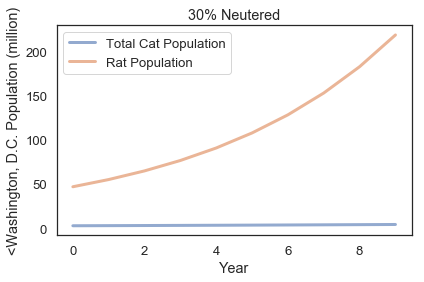

In [228]:
plot_results(catData, ratData, '30% Neutered')
savefig('figs/project-1.pdf')

The above graph shows that with very few neutered cats, cat and rat populations will both grow over a period of 10 years.

To Do:
- Rate that rats repopulate at
- Rate that cats repopulate at
- Plug in more reasonable data: neutered cat numbers, not neutered cats, cats neutered a year, rat population, rat growth rate
- Rat and cat populations
- Add randomness factor
- Coding:
- Have automatic title based on percent neutered (Use combination of string and var)
- Put code in a function to generate data

Assumptions/Notes:
* Cat population independent of rat population
* Will be neutered from existing cat population